# Understanding Gene Relationships through Various Network Visualization Approaches

In [17]:
import pandas as pd

In [18]:
from statistics import *

In [19]:
import netrd as net

In [20]:
from scipy import stats

In [21]:
import random

In [22]:
from datetime import datetime

In [23]:
# viz:
import seaborn as sns
import matplotlib.pyplot as plt

## Achilles Data
Source: [DepMap](https://depmap.org/portal/achilles/)

Download portal: [Achilles](https://depmap.org/portal/download/all/)

## Gene Effect (NNMD - Null-Normalized Mean Difference)

In [24]:
start_time = datetime.now()
gene_effect = pd.read_csv('data/achilles_gene_effect.csv',index_col=0)
print('elapsed time:', datetime.now() - start_time)

elapsed time: 0:00:08.490045


In [25]:
gene_effect.shape

(625, 18333)

In [26]:
gene_effect

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000004,0.168684,0.089128,-0.196966,-0.021260,0.038541,-0.175141,0.349346,-0.441008,0.291208,0.147993,...,-0.135665,-0.461810,NaN,NaN,0.253495,0.233904,-0.406140,0.283878,0.230978,-0.135112
ACH-000005,-0.068759,0.218792,0.178252,0.158390,-0.193862,-0.324566,0.246220,-0.576495,-0.081217,0.016182,...,-0.176432,-0.391199,-0.182117,-0.108978,0.186545,-0.075884,-0.095781,0.029269,0.000945,-0.242038
ACH-000007,0.053893,0.081444,-0.060170,0.153435,0.087362,0.150684,0.061146,-0.470462,-0.012210,0.277616,...,-0.101852,-0.276755,-0.030821,0.121126,0.214875,-0.019300,-0.342632,0.083610,-0.392722,-0.443380
ACH-000009,0.059874,-0.011153,-0.054367,0.060886,0.039767,0.043527,0.011845,-0.630290,0.161797,0.033587,...,-0.355880,-0.290047,-0.031825,0.115886,0.116784,0.035294,-0.575523,0.228940,-0.114559,-0.549906
ACH-000011,0.277165,0.085354,0.007972,0.445843,-0.036717,-0.261409,0.111173,-0.430867,0.138193,0.120785,...,-0.418769,-0.518908,-0.128187,-0.126336,0.269698,0.148516,-0.227106,0.120656,-0.252444,-0.401821
ACH-000012,0.008073,0.167177,0.088705,0.307599,0.015440,-0.137284,0.264126,-0.491951,0.073552,0.308495,...,-0.393597,-0.834722,0.062316,-0.045060,0.133700,0.122965,-0.132978,0.050321,-0.175689,-0.402526
ACH-000013,0.062131,0.038687,-0.043841,0.200285,-0.070484,-0.072263,0.058271,-0.474665,0.031876,0.268895,...,0.008042,0.124692,-0.058500,-0.040608,0.238244,-0.030644,-0.172263,0.145374,-0.206768,-0.540681
ACH-000014,0.143078,-0.035837,0.010997,0.182625,-0.034048,-0.100745,-0.147548,-0.478343,-0.073118,0.163341,...,-0.193486,-0.932615,NaN,NaN,-0.065987,0.024524,-0.191035,-0.059532,0.220589,-0.328847
ACH-000015,-0.090890,0.007894,-0.185690,0.111529,-0.033507,-0.120201,0.240126,-0.369685,0.164322,0.232466,...,-0.103288,-0.237725,-0.048158,-0.014440,0.334302,0.178671,-0.271045,0.178024,-0.278946,-0.207964
ACH-000017,0.178427,0.106952,-0.068145,0.109807,-0.195903,-0.129935,0.255632,-0.368921,0.013102,0.174521,...,-0.174715,-0.646525,-0.042260,0.221313,0.097621,0.096192,-0.224735,0.256629,-0.293197,-0.244157


In [27]:
stats.describe(gene_effect[random.choice(list(gene_effect.columns))])

DescribeResult(nobs=625, minmax=(-0.357123720145, 0.41514781769299997), mean=0.0927052518237865, variance=0.009430720189636997, skewness=-0.2843850160768815, kurtosis=1.2908797816368738)

Visualizing NNMD Distributions of 100 random genes from gene_effect data


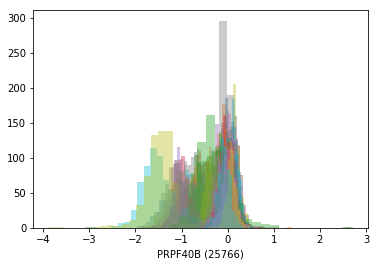

In [28]:
print('Visualizing NNMD Distributions of 100 random genes from gene_effect data')
for g in random.sample(list(gene_effect.columns), 100):
    sns.distplot(gene_effect[g].fillna(0),bins=20,kde=False)

In [29]:
gene_effect.min().min()

-4.4923381539

In [30]:
gene_effect.min().sort_values(ascending=True).head(5)

RAN (5901)          -4.492338
BUB3 (9184)         -3.961129
HIST2H3A (333932)   -3.888375
HSPE1 (3336)        -3.634067
EEF2 (1938)         -3.522135
dtype: float64

In [31]:
gene_effect.max().max()

6.384527418539999

In [32]:
gene_effect.max().sort_values(ascending=False).head(5)

PTEN (5728)         6.384527
TP53 (7157)         4.831093
ARRDC3 (57561)      3.974578
GPAT4 (137964)      3.070844
NPIPB15 (440348)    3.054422
dtype: float64

In [33]:
pd.DataFrame(gene_effect.dtypes)

,0
A1BG (1),float64
A1CF (29974),float64
A2M (2),float64
A2ML1 (144568),float64
A3GALT2 (127550),float64


## Gene Dependency
**Note:** We chose to use the `gene dependency` data set instead of the `gene effect` data set because the `gene effect` data set is the CERES score with a Null-Normalized Mean Difference (difference from the null model of cell line survival), whereas the `gene dependency` data set is a simple probability ( 0 < p < 1 ) of importance from the null model of cell line survival. Learn more at the [DepMap FAQs](https://depmap.org/portal/faq/)

In [34]:
start_time = datetime.now()
gene_dep = pd.read_csv('data/achilles_gene_dependency.csv',index_col=0)
print('elapsed time:', datetime.now() - start_time)

elapsed time: 0:00:08.218925


In [35]:
gene_dep.shape

(625, 18333)

In [36]:
gene_dep.head(10)

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000004,0.001451,0.004520,0.102872,0.018067,0.008767,0.085647,0.000065,0.431382,0.000192,0.001974,...,0.060016,0.465022,NaN,NaN,0.000372,0.000517,0.374798,0.000220,0.000541,0.059707
ACH-000005,0.026104,0.001092,0.001859,0.002384,0.073250,0.175472,0.000745,0.528323,0.029178,0.011600,...,0.064166,0.252776,0.067042,0.037138,0.001671,0.027810,0.033134,0.010160,0.013513,0.103597
ACH-000007,0.004364,0.003030,0.017460,0.001112,0.002801,0.001155,0.003964,0.432981,0.009979,0.000158,...,0.027625,0.137708,0.012447,0.001760,0.000440,0.010849,0.219132,0.002946,0.296057,0.383729
ACH-000009,0.002986,0.008234,0.014550,0.002942,0.004015,0.003802,0.005994,0.671296,0.000620,0.004395,...,0.240007,0.154809,0.010861,0.001271,0.001252,0.004284,0.592691,0.000227,0.030041,0.552916
ACH-000011,0.000254,0.003716,0.009770,0.000015,0.016456,0.131691,0.002650,0.350667,0.001843,0.002332,...,0.331856,0.493477,0.042943,0.042179,0.000285,0.001603,0.101851,0.002336,0.123363,0.306065
ACH-000012,0.006585,0.000650,0.002101,0.000076,0.005949,0.039098,0.000148,0.496048,0.002616,0.000075,...,0.316770,0.903348,0.003081,0.013213,0.001073,0.001261,0.037322,0.003660,0.058364,0.332458
ACH-000013,0.004887,0.006845,0.020258,0.000569,0.027806,0.028374,0.005170,0.505162,0.007531,0.000194,...,0.010434,0.001892,0.024174,0.019491,0.000312,0.017229,0.079498,0.001365,0.107523,0.619927
ACH-000014,0.001156,0.012898,0.007196,0.000637,0.012610,0.027250,0.044594,0.451602,0.019987,0.000854,...,0.069487,0.932838,NaN,NaN,0.018422,0.006032,0.067962,0.017100,0.000352,0.204259
ACH-000015,0.026106,0.007272,0.072215,0.001568,0.012737,0.036572,0.000224,0.290348,0.000692,0.000250,...,0.030156,0.115563,0.015421,0.009875,0.000063,0.000555,0.151136,0.000561,0.160490,0.089013
ACH-000017,0.000980,0.002869,0.028000,0.002748,0.100577,0.054300,0.000285,0.322310,0.010416,0.001041,...,0.083403,0.715688,0.020735,0.000497,0.003282,0.003351,0.127736,0.000280,0.209408,0.148503


Visualizing Probability Distributions of 100 random genes from gene_dependency data


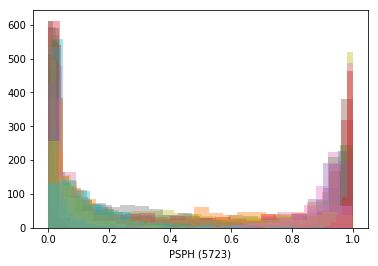

In [37]:
print('Visualizing Probability Distributions of 100 random genes from gene_dependency data')
for g in random.sample(list(gene_dep.columns), 100):
    sns.distplot(gene_dep[g].fillna(0),bins=20,kde=False)

In [38]:
gene_dep.min().sort_values(ascending=True).head(5)

IL33 (90865)       0.0
TLR5 (7100)        0.0
GJA1 (2697)        0.0
GIMAP4 (55303)     0.0
GGTLC3 (728226)    0.0
dtype: float64

In [39]:
gene_dep.max().sort_values(ascending=False).head(5)

CHMP3 (51652)     1.0
RPL12 (6136)      1.0
RPAP2 (79871)     1.0
CHMP6 (79643)     1.0
SMARCB1 (6598)    1.0
dtype: float64

## DepMap Cell Line Metadata

In [40]:
cell_lines = pd.read_csv('data/depmap-2019q1-celllines_v2.csv',index_col=0)

In [41]:
cell_lines.head(5)

,CCLE_Name,Aliases,COSMIC_ID,Sanger ID,Primary Disease,Subtype Disease,Gender,Source
DepMap_ID,,,,,,,,
ACH-000001,NIHOVCAR3_OVARY,NIH:OVCAR-3;OVCAR3,905933.0,2201.0,Ovarian Cancer,"Adenocarcinoma, high grade serous",Female,ATCC
ACH-000002,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HL-60,905938.0,55.0,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",Female,ATCC
ACH-000003,CACO2_LARGE_INTESTINE,CACO2;CACO2;CaCo-2,NaN,NaN,Colon/Colorectal Cancer,Colon Adenocarcinoma,-1,NaN
ACH-000004,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL,907053.0,783.0,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",Male,DSMZ
ACH-000005,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL 92.1.7,NaN,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",Male,ATCC


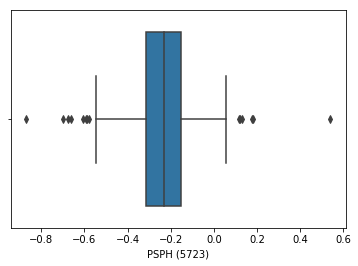

In [44]:
sns.boxplot(gene_effect[g].reset_index()[g])

In [45]:
lines_in_ge = list(gene_effect.index)

In [47]:
# Filter cell lines metadata to only cell lines in the gene effect dataset
metadata = cell_lines[cell_lines.index.isin(list(gene_effect.index))]

In [48]:
metadata.to_pickle('data/filtered_cell_lines_metadata.pkl')

**Code rest stop: load filtered metadata**

In [49]:
metadata = pd.read_pickle('data/filtered_cell_lines_metadata.pkl')

In [50]:
metadata.columns

Index(['CCLE_Name', 'Aliases', 'COSMIC_ID', 'Sanger ID', 'Primary Disease',
       'Subtype Disease', 'Gender', 'Source'],
      dtype='object')

In [51]:
metadata.shape

(622, 8)

In [52]:
diseases = pd.DataFrame(metadata.groupby('Primary Disease').size().sort_values(ascending=False),columns=(['cell_line_count']))
diseases.shape

(28, 1)

<BarContainer object of 28 artists>

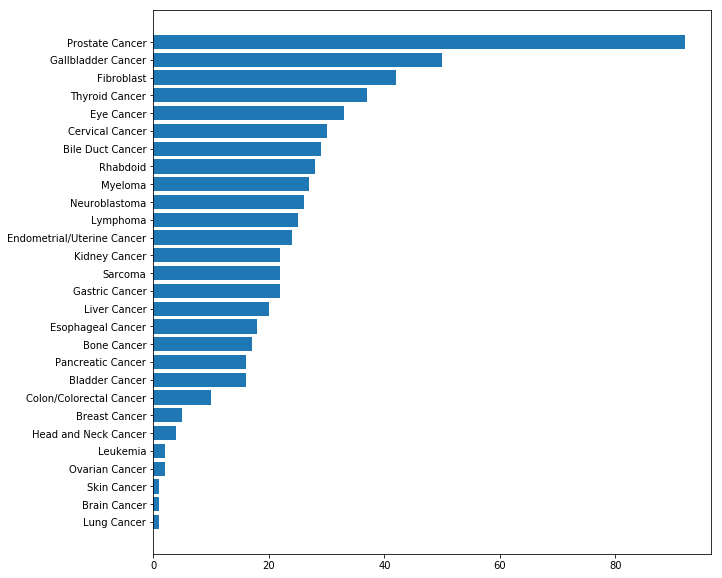

In [77]:
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(diseases.index,diseases['cell_line_count'].sort_values(ascending=True))

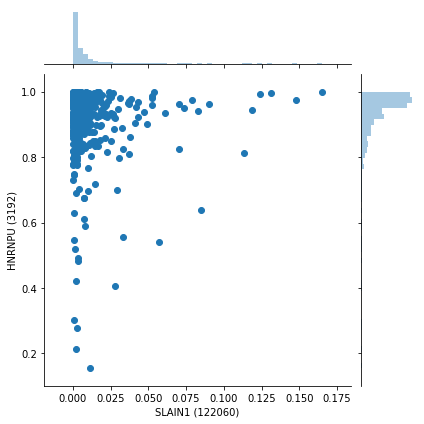

In [54]:
x=random.choice(list(gene_dep.columns))
y=random.choice(list(gene_dep.columns))
g = sns.jointplot(x=x, y=y, data=gene_dep)
g.set_axis_labels(x,y)

## Gene Dependency Ranks by Cell Line

In [55]:
ranks = pd.DataFrame(index=gene_dep.columns, columns=list(gene_dep.index))

In [56]:
cell_line = random.choice(list(gene_dep.index))
gene = random.choice(list(gene_dep.columns))
gene_dep.loc[cell_line].rank().head(10)

A1BG (1)             4889.0
A1CF (29974)         3361.0
A2M (2)              9206.0
A2ML1 (144568)       3274.0
A3GALT2 (127550)    11062.0
A4GALT (53947)       3784.0
A4GNT (51146)        3751.0
AAAS (8086)         16127.0
AACS (65985)         5502.0
AADAC (13)            755.0
Name: ACH-001061, dtype: float64

In [57]:
# Calculate gene dependency ranks for each cell line
start_time = datetime.now()
i=1
r=list(gene_dep.index)
l=len(r)
for cell_line in r:
    print('analyzing cell line',cell_line,i,"of",l)
    ranks[cell_line]=gene_dep.loc[cell_line].rank()
    i+=1
print('elapsed time:', datetime.now() - start_time)

analyzing cell line ACH-000004 1 of 625
analyzing cell line ACH-000005 2 of 625
analyzing cell line ACH-000007 3 of 625
analyzing cell line ACH-000009 4 of 625
analyzing cell line ACH-000011 5 of 625
analyzing cell line ACH-000012 6 of 625
analyzing cell line ACH-000013 7 of 625
analyzing cell line ACH-000014 8 of 625
analyzing cell line ACH-000015 9 of 625
analyzing cell line ACH-000017 10 of 625
analyzing cell line ACH-000018 11 of 625
analyzing cell line ACH-000019 12 of 625
analyzing cell line ACH-000021 13 of 625
analyzing cell line ACH-000022 14 of 625
analyzing cell line ACH-000025 15 of 625
analyzing cell line ACH-000028 16 of 625
analyzing cell line ACH-000029 17 of 625
analyzing cell line ACH-000030 18 of 625
analyzing cell line ACH-000035 19 of 625
analyzing cell line ACH-000036 20 of 625
analyzing cell line ACH-000037 21 of 625
analyzing cell line ACH-000039 22 of 625
analyzing cell line ACH-000040 23 of 625
analyzing cell line ACH-000041 24 of 625
analyzing cell line ACH-0

analyzing cell line ACH-000414 200 of 625
analyzing cell line ACH-000415 201 of 625
analyzing cell line ACH-000416 202 of 625
analyzing cell line ACH-000420 203 of 625
analyzing cell line ACH-000421 204 of 625
analyzing cell line ACH-000422 205 of 625
analyzing cell line ACH-000424 206 of 625
analyzing cell line ACH-000425 207 of 625
analyzing cell line ACH-000426 208 of 625
analyzing cell line ACH-000427 209 of 625
analyzing cell line ACH-000433 210 of 625
analyzing cell line ACH-000434 211 of 625
analyzing cell line ACH-000436 212 of 625
analyzing cell line ACH-000437 213 of 625
analyzing cell line ACH-000444 214 of 625
analyzing cell line ACH-000445 215 of 625
analyzing cell line ACH-000448 216 of 625
analyzing cell line ACH-000450 217 of 625
analyzing cell line ACH-000452 218 of 625
analyzing cell line ACH-000454 219 of 625
analyzing cell line ACH-000458 220 of 625
analyzing cell line ACH-000459 221 of 625
analyzing cell line ACH-000460 222 of 625
analyzing cell line ACH-000461 223

analyzing cell line ACH-000791 398 of 625
analyzing cell line ACH-000792 399 of 625
analyzing cell line ACH-000793 400 of 625
analyzing cell line ACH-000794 401 of 625
analyzing cell line ACH-000796 402 of 625
analyzing cell line ACH-000799 403 of 625
analyzing cell line ACH-000800 404 of 625
analyzing cell line ACH-000801 405 of 625
analyzing cell line ACH-000802 406 of 625
analyzing cell line ACH-000804 407 of 625
analyzing cell line ACH-000805 408 of 625
analyzing cell line ACH-000809 409 of 625
analyzing cell line ACH-000810 410 of 625
analyzing cell line ACH-000811 411 of 625
analyzing cell line ACH-000817 412 of 625
analyzing cell line ACH-000819 413 of 625
analyzing cell line ACH-000820 414 of 625
analyzing cell line ACH-000821 415 of 625
analyzing cell line ACH-000822 416 of 625
analyzing cell line ACH-000823 417 of 625
analyzing cell line ACH-000824 418 of 625
analyzing cell line ACH-000827 419 of 625
analyzing cell line ACH-000829 420 of 625
analyzing cell line ACH-000831 421

analyzing cell line ACH-001496 594 of 625
analyzing cell line ACH-001500 595 of 625
analyzing cell line ACH-001521 596 of 625
analyzing cell line ACH-001522 597 of 625
analyzing cell line ACH-001523 598 of 625
analyzing cell line ACH-001524 599 of 625
analyzing cell line ACH-001529 600 of 625
analyzing cell line ACH-001532 601 of 625
analyzing cell line ACH-001536 602 of 625
analyzing cell line ACH-001550 603 of 625
analyzing cell line ACH-001552 604 of 625
analyzing cell line ACH-001554 605 of 625
analyzing cell line ACH-001555 606 of 625
analyzing cell line ACH-001563 607 of 625
analyzing cell line ACH-001566 608 of 625
analyzing cell line ACH-001568 609 of 625
analyzing cell line ACH-001645 610 of 625
analyzing cell line ACH-001647 611 of 625
analyzing cell line ACH-001650 612 of 625
analyzing cell line ACH-001654 613 of 625
analyzing cell line ACH-001715 614 of 625
analyzing cell line ACH-001735 615 of 625
analyzing cell line ACH-001736 616 of 625
analyzing cell line ACH-001737 617

In [59]:
ranks

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
A1BG (1),2157.0,9283.0,5974.0,4547.0,726.0,6645.0,4814.0,2770.0,10265.0,2005.0,...,2263.0,8525.0,6952.0,1150.0,5339.0,2401.0,2387.0,9692.0,10047.0,4749.0
A1CF (29974),4097.0,2151.0,5117.0,6972.0,4673.0,1772.0,5660.0,7878.0,6771.0,3759.0,...,6572.0,3726.0,298.0,2155.0,2890.0,6289.0,11554.0,4134.0,2873.0,6567.0
A2M (2),12337.0,2862.0,9501.0,8510.0,7230.0,3804.0,8849.0,6429.0,12913.0,9835.0,...,11600.0,9162.0,12895.0,11569.0,9665.0,10940.0,13219.0,11490.0,6062.0,4342.0
A2ML1 (144568),7531.0,3271.0,3164.0,4521.0,110.0,257.0,1096.0,1930.0,3348.0,3683.0,...,5372.0,5305.0,1319.0,1853.0,2738.0,4210.0,6047.0,773.0,858.0,1154.0
A3GALT2 (127550),5630.0,12276.0,4953.0,5208.0,8739.0,6374.0,9834.0,7816.0,8266.0,13207.0,...,13344.0,4162.0,8927.0,11428.0,12201.0,11227.0,4192.0,8704.0,10192.0,8376.0
A4GALT (53947),11884.0,14512.0,3245.0,5093.0,14123.0,11503.0,9907.0,9876.0,11204.0,11675.0,...,5271.0,14745.0,8225.0,9918.0,14436.0,4387.0,5051.0,14217.0,6912.0,11235.0
A4GNT (51146),271.0,1750.0,5756.0,6179.0,3926.0,501.0,4946.0,11114.0,836.0,775.0,...,1085.0,4813.0,9051.0,3304.0,3239.0,7420.0,11754.0,641.0,2760.0,11189.0
AAAS (8086),15200.0,16384.0,15938.0,16602.0,15741.0,16134.0,16105.0,15332.0,15544.0,15391.0,...,16314.0,16352.0,16505.0,16284.0,16747.0,16073.0,15689.0,16318.0,15923.0,16218.0
AACS (65985),552.0,9608.0,7993.0,1944.0,3143.0,4269.0,5921.0,9121.0,1969.0,6866.0,...,4693.0,2212.0,8110.0,3702.0,5159.0,9717.0,7085.0,2303.0,6047.0,2947.0
AADAC (13),2597.0,6913.0,1046.0,5444.0,3631.0,250.0,380.0,2331.0,921.0,2074.0,...,2098.0,5349.0,3670.0,3874.0,9135.0,1959.0,4492.0,461.0,1260.0,897.0


In [60]:
ranks.to_pickle('data/gene_dependency_ranks.pkl')

**Code rest stop: read in ranks**

In [61]:
ranks = pd.read_pickle('data/gene_dependency_ranks.pkl')

In [62]:
random.sample(list(ranks.index), 10)

['NLGN4X (57502)',
 'KCNJ2 (3759)',
 'ERCC1 (2067)',
 'TOPAZ1 (375337)',
 'CYP17A1 (1586)',
 'DQX1 (165545)',
 'C5orf51 (285636)',
 'MCRIP2 (84331)',
 'HSP90B1 (7184)',
 'NCAPG (64151)']

In [63]:
ranks.head()

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
A1BG (1),2157.0,9283.0,5974.0,4547.0,726.0,6645.0,4814.0,2770.0,10265.0,2005.0,...,2263.0,8525.0,6952.0,1150.0,5339.0,2401.0,2387.0,9692.0,10047.0,4749.0
A1CF (29974),4097.0,2151.0,5117.0,6972.0,4673.0,1772.0,5660.0,7878.0,6771.0,3759.0,...,6572.0,3726.0,298.0,2155.0,2890.0,6289.0,11554.0,4134.0,2873.0,6567.0
A2M (2),12337.0,2862.0,9501.0,8510.0,7230.0,3804.0,8849.0,6429.0,12913.0,9835.0,...,11600.0,9162.0,12895.0,11569.0,9665.0,10940.0,13219.0,11490.0,6062.0,4342.0
A2ML1 (144568),7531.0,3271.0,3164.0,4521.0,110.0,257.0,1096.0,1930.0,3348.0,3683.0,...,5372.0,5305.0,1319.0,1853.0,2738.0,4210.0,6047.0,773.0,858.0,1154.0
A3GALT2 (127550),5630.0,12276.0,4953.0,5208.0,8739.0,6374.0,9834.0,7816.0,8266.0,13207.0,...,13344.0,4162.0,8927.0,11428.0,12201.0,11227.0,4192.0,8704.0,10192.0,8376.0


Visualizing Rank Distributions of 100 random genes from gene_dependency data


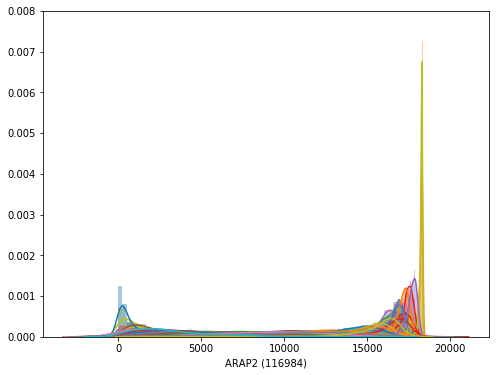

In [78]:
print('Visualizing Rank Distributions of 100 random genes from gene_dependency data')
for g in random.sample(list(ranks.index), 100):
    plt.rcParams["figure.figsize"] = (8,6)
    sns.distplot(ranks.loc[g].fillna(0))

In [79]:
from statistics import variance,mean,median

In [80]:
import numpy as np

In [81]:
median(ranks.loc['A4GALT (53947)'])

8446.0

In [82]:
ranks.loc['A4GALT (53947)'].std()

3230.1551331722408

In [83]:
stats = pd.DataFrame(index=ranks.index,columns=['std','mean','median'])

In [84]:
stats['std']=[ranks.loc[g].std() for g in stats.index]

In [85]:
stats['mean']=[np.nanmean(ranks.loc[g]) for g in stats.index]

In [86]:
stats['median']=[median(ranks.loc[g]) for g in stats.index]

In [87]:
stats.to_pickle('data/gene_dependency_rank_stats.pkl')

In [88]:
stats.head(10)

,std,mean,median
A1BG (1),3035.358185,4427.3760,3753.0
A1CF (29974),3055.178004,5107.5984,4626.0
A2M (2),2897.901026,8900.2928,9198.0
A2ML1 (144568),2210.593643,2611.4336,1881.0
A3GALT2 (127550),3425.762390,8661.8576,8722.0
A4GALT (53947),3230.155133,8380.8560,8446.0
A4GNT (51146),2786.912939,4287.8800,3817.0
AAAS (8086),1101.659548,15899.6800,16130.0
AACS (65985),3159.182321,4988.8080,4520.0
AADAC (13),2871.518983,3385.7344,2642.0


**Mean of rank distribution**

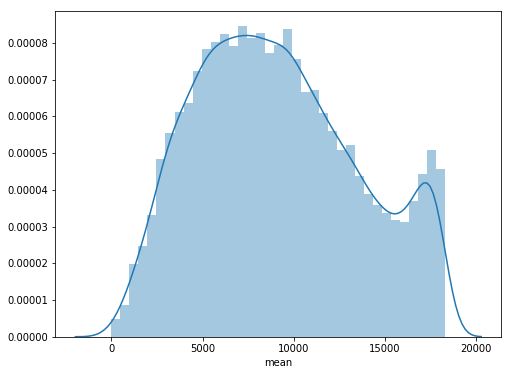

In [89]:
sns.distplot(stats['mean'].fillna(0))

**Median of rank distribution**

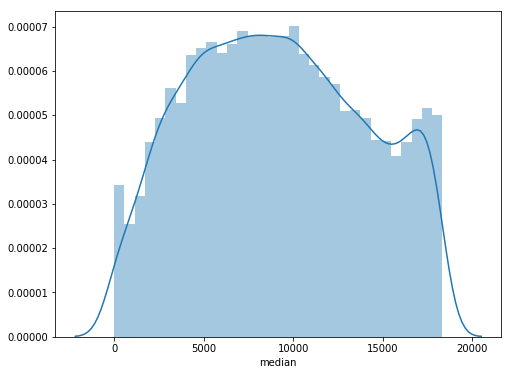

In [90]:
sns.distplot(stats['median'].fillna(0))

**Standard Deviation of rank distribution**

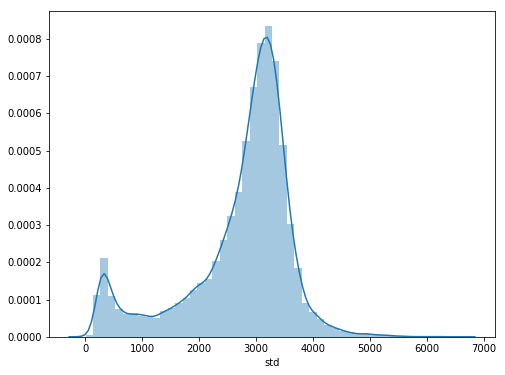

In [91]:
sns.distplot(stats['std'].fillna(0))

## Calculating Correlation Matrix for Cell Lines

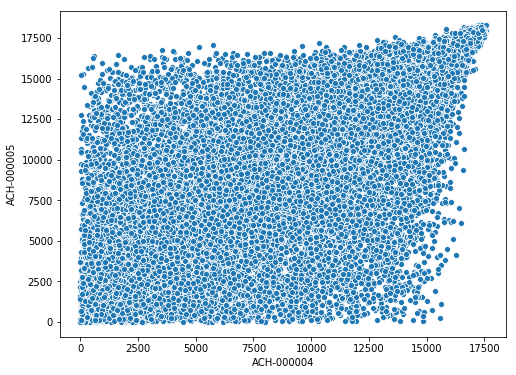

In [92]:
sns.scatterplot(x=ranks['ACH-000004'],y=ranks['ACH-000005'])

In [93]:
correlation_matrix = ranks[ranks.columns].corr()
correlation_matrix.head(5)

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
ACH-000004,1.000000,0.629261,0.624370,0.666333,0.630026,0.693843,0.695018,0.636527,0.682450,0.658235,...,0.680178,0.490510,0.674620,0.677290,0.659535,0.696404,0.584281,0.646931,0.714480,0.662700
ACH-000005,0.629261,1.000000,0.578286,0.603746,0.614765,0.642996,0.654375,0.589318,0.635134,0.624684,...,0.640137,0.468637,0.600251,0.631651,0.630577,0.657242,0.557930,0.610678,0.661086,0.635976
ACH-000007,0.624370,0.578286,1.000000,0.683612,0.656175,0.693404,0.694829,0.639489,0.687276,0.665113,...,0.667659,0.476004,0.655168,0.676164,0.666603,0.689267,0.598315,0.660279,0.714157,0.680490
ACH-000009,0.666333,0.603746,0.683612,1.000000,0.681248,0.766020,0.751206,0.686143,0.744758,0.702650,...,0.699709,0.517902,0.692505,0.722090,0.703546,0.747048,0.633466,0.689536,0.769797,0.742583
ACH-000011,0.630026,0.614765,0.656175,0.681248,1.000000,0.711702,0.732991,0.677653,0.701527,0.694800,...,0.694069,0.528279,0.673673,0.697370,0.717578,0.736599,0.637298,0.703216,0.755500,0.745994


In [ ]:
sns.clustermap(correlation_matrix)

# [This code continues on Google Collab here](https://colab.research.google.com/drive/1MJbvuvzVhiKs9dUJj78jkldzDDZl_W7c)